<center><h1 style="font-size:2em;color:#2467C0">Creación de pares </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/Creaciondepares.png" align="middle" style="width:550px;"/></td>
<td>
    
$\gamma + \gamma\longrightarrow e^+ + e^- $

    
<br>
</td>
</tr>
</table>

La creación o producción de pares se da cuando dos fotones, a través de una partícula virtual (propagador), se condensan para crear un par electrón y positrón. Este proceso es un componente clave para explicar la equivalencia masa-energía, sin embargo, se desconocen los procesos más profundos mediante los cuales los fotones se transforman en pares materia-antimateria. 
A partir de la energía de los fotones involucrados, se produce una par partícula-antipartícula, generalmente un electrón y un positrón. Otros posibles resultados incluyen pares de muones y tau, y los fermiones elementales (quarks y leptones) en general. En todos los casos, es necesario que haya suficiente energía en el sistema para producir esos pares, que para un electrón en reposo es de 0,511 MeV, y se requiere la misma energía para producir el positrón.

## Definición de matrices y constantes a usar

### Tensor métrico $g_{\mu \nu}$

1    0    0    0

0    -1   0    0

0    0    -1   0

0    0    0    -1
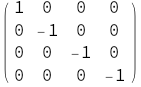

In [1]:
g[mu_, nu_] := Module[{},
    DiagonalMatrix[{1, -1, -1, -1}][[mu + 1,nu + 1]]
]
Table[g[mu, nu], {mu, 0, 3}, {nu, 0, 3}] // MatrixForm

### Matrices $\gamma$

1    0    0    0

0    1    0    0

0    0    -1   0

0    0    0    -1
0    0    0    1

0    0    1    0

0    -1   0    0

-1   0    0    0
0    0    0    -I

0    0    I    0

0    I    0    0

-I   0    0    0
0    0    1    0

0    0    0    -1

-1   0    0    0

0    1    0    0
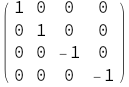
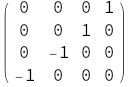
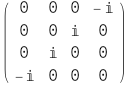
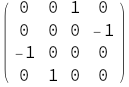

In [3]:
gamma[mu_] := Module[{beta, alpha1, alpha2, alpha3, gammas},
    beta = DiagonalMatrix[{1, 1, -1, -1}];
    alpha1 = Reverse[IdentityMatrix[4]];
    alpha2 = Reverse[DiagonalMatrix[{I, -I, I, -I}]];
    alpha3 = {{0, 0, 1, 0}, {0, 0, 0, -1}, {1, 0, 0, 0}, {0, -1, 0, 0}};
    gammas = {beta, beta . alpha1, beta . alpha2, beta . alpha3};
    gammas[[mu+1]]
]
MatrixForm[gamma[0]]
MatrixForm[gamma[1]]
MatrixForm[gamma[2]]
MatrixForm[gamma[3]]

### Espinores

0
p

 1
p

 2
p

 3
p
 0
p
 1

 1
p
 1

 2
p
 1

 3
p
 1
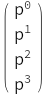
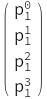

In [8]:
fourvector[a_, n_:{}] := Which[n==={}, Table[Superscript[a, j], {j, 0, 3}], True, Table[Subsuperscript[a, n, j], {j, 0, 3}]]
fourvector[p] // MatrixForm
fourvector[p, 1] // MatrixForm

0
Sqrt[m + p ]





0

      3
     p
------------
          0
Sqrt[m + p ]

  1      2
 p  + I p
------------
          0
Sqrt[m + p ]




0




          0
Sqrt[m + p ]

  1      2
 p  - I p
------------
          0
Sqrt[m + p ]

        3
       p
-(------------)
            0
  Sqrt[m + p ]
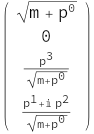
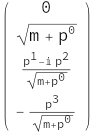

In [11]:
SpinorU[s_, p_, m_] := Module[{En, px, py, pz, pmas, pmenos, u1, u2},(
    {En, px, py, pz} = p;
    pmas = px + I * py;
    pmenos = px - I * py;
    u1 = Sqrt[En+m] {{1}, {0}, {pz/(En+m)}, {pmas/(En+m)}};
    u2 = Sqrt[En+m] {{0}, {1}, {pmenos/(En+m)}, {-pz/(En+m)}};
    {u1, u2}[[s]]
)]
SpinorU[1, fourvector[p], m] // MatrixForm
SpinorU[2, fourvector[p], m] // MatrixForm

3
     p
------------
          0
Sqrt[m + p ]

  1      2
 p  + I p
------------
          0
Sqrt[m + p ]




          0
Sqrt[m + p ]





0
  1      2
 p  - I p
------------
          0
Sqrt[m + p ]

        3
       p
-(------------)
            0
  Sqrt[m + p ]





0




          0
Sqrt[m + p ]
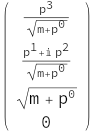
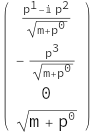

In [14]:
SpinorV[s_, p_, m_] := Module[{En, px, py, pz, pmas, pmenos, v1, v2},(
    {En, px, py, pz} = p;
    pmas = px + I * py;
    pmenos = px - I * py;
    v1 = Sqrt[En+m] {{pz/(En+m)}, {pmas/(En+m)}, {1}, {0}};
    v2 = Sqrt[En+m] {{pmenos/(En+m)}, {-pz/(En+m)}, {0}, {1}};
    {v1, v2}[[s]]
)]
SpinorV[1, fourvector[p], m] // MatrixForm
SpinorV[2, fourvector[p], m] // MatrixForm

In [17]:
SpinorBar[x_] := ConjugateTranspose[x].gamma[0]

0                          3            1      2
p            0            -p           -p  + I p

              0             1      2    3
0            p            -p  - I p    p

 3            1      2      0
p            p  - I p     -p           0

 1      2      3                         0
p  + I p     -p           0            -p
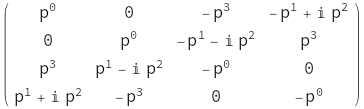

In [18]:
Slash[p_] := Sum[gamma[mu]*g[mu, nu] * p[[nu+1]], {mu, 0, 3}, {nu, 0, 3}]
Slash[fourvector[p]] // MatrixForm

## Cálculo de la amplitud

<td><img src="figuras/Creaciondepares.png" align="middle" style="width:1000px;"/></td>

Para el cálculo de la amplitud, cada componente del diagrama aporta una expresión según se muestra en la siguiente tabla:

| Componente | Aportación |
|-|-|
| Electrón saliendo | $\bar{u}$ |
| Positrón saliendo | $v$ |
| Vértice | $-ieQ\gamma^\mu$ |
| Electrón (propagador) | $\frac{i\left(\cancel{q}+m\right)}{q^2-m^2}$ |
| Fotón entrando | $\epsilon_\mu$ |

Se propone que los momentos $\textbf{P}_1$ y $\textbf{P}_2$ sean opuestos y tengan componentes solo en el eje $z$. Del mismo modo, los momentos $\textbf{P}_3$ y $\textbf{P}_4$ también serán opuestos el uno del otro.

In [20]:
Map[Function[u, Conjugate[u] ^= u], {E1, E3, p1z, p3x, p3y, p3z, me}];
Map[Function[Sign[#] ^= 1], {me, E1, E3}];

In [22]:
p1 = {E1, 0, 0, p1z}
p2 = {E1, 0, 0, -p1z}
p3 = {E3, p3x, p3y, p3z}
p4 = {E3, -p3x, -p3y, -p3z}

{E1, 0, 0, p1z}
{E1, 0, 0, -p1z}
{E3, p3x, p3y, p3z}
{E3, -p3x, -p3y, -p3z}

In [26]:
epsilon[s_, mu_] := Module[{},
    {{0, 1, 0, 0}, {0, 0, 1, 0}}[[s, mu + 1]]
]

In [27]:
M1sinsuma[s1_, s2_, s3_, s4_, mu_, nu_] := (epsilon[s1, mu] epsilon[s2, nu] SpinorBar[SpinorU[s3, p3, me]].gamma[mu].((Slash[p3-p1]+me IdentityMatrix[4])/((p3-p1).(p3-p1)-me*me)).gamma[nu].SpinorV[s4, p4, me])[[1,1]]

In [28]:
M2sinsuma[s1_, s2_, s3_, s4_, mu_, nu_] := (epsilon[s2, mu] epsilon[s1, nu] SpinorBar[SpinorU[s3, p3, me]].gamma[mu].((Slash[p3-p2]+me IdentityMatrix[4])/((p3-p2).(p3-p2)-me*me)).gamma[nu].SpinorV[s4, p4, me])[[1,1]]

In [29]:
M1sumamunu[s1_, s2_, s3_, s4_] := Sum[M1sinsuma[s1, s2, s3, s4, mu, nu], {mu, 0, 3}, {nu, 0, 3}]

In [30]:
M2sumamunu[s1_, s2_, s3_, s4_] := Sum[M2sinsuma[s1, s2, s3, s4, mu, nu], {mu, 0, 3}, {nu, 0, 3}]

In [31]:
M[s1_, s2_, s3_, s4_] := M1sumamunu[s1, s2, s3, s4] + M2sumamunu[s1, s2, s3, s4]

(E1 - E3 + me) Sqrt[E3 + me]
((p3z (-(-----------------------------------------------) - 
                   2     2      2      2               2
         (-E1 + E3)  - me  + p3x  + p3y  + (-p1z + p3z)
 
                             (p3x - I p3y) (-p3x + I p3y)
>           --------------------------------------------------------------- + 
                                     2     2      2      2               2
            Sqrt[E3 + me] ((-E1 + E3)  - me  + p3x  + p3y  + (-p1z + p3z) )
 
                                    (p1z - p3z) p3z
>           ---------------------------------------------------------------)) / 
                                     2     2      2      2               2
            Sqrt[E3 + me] ((-E1 + E3)  - me  + p3x  + p3y  + (-p1z + p3z) )
 
>       Sqrt[E3 + me] + Sqrt[E3 + me] 
 
                                 (-E1 + E3 + me) p3z
>       (-(---------------------------------------------------------------) + 
                                    2     2      2      2               2
           Sqrt[E3 + me] ((-E1 + E3)  - me  + p3x  + p3y  + (-p1z + p3z) )
 
                    Sqrt[E3 + me] (-p1z + p3z)
>         -----------------------------------------------) + 
                    2     2      2      2               2
          (-E1 + E3)  - me  + p3x  + p3y  + (-p1z + p3z)
 
>      ((-p3x - I p3y) (
 
                                   (-p3x - I p3y) p3z
>            --------------------------------------------------------------- - 
                                      2     2      2      2               2
             Sqrt[E3 + me] ((-E1 + E3)  - me  + p3x  + p3y  + (-p1z + p3z) )
 
                              (p3x - I p3y) (-p1z + p3z)
>           ---------------------------------------------------------------)) / 
                                     2     2      2      2               2
            Sqrt[E3 + me] ((-E1 + E3)  - me  + p3x  + p3y  + (-p1z + p3z) )
 
                                         (E1 - E3 + me) Sqrt[E3 + me]
>       Sqrt[E3 + me] + (p3z (-(----------------------------------------------) - 
                                          2     2      2      2              2
                                (-E1 + E3)  - me  + p3x  + p3y  + (p1z + p3z)
 
                             (p3x - I p3y) (-p3x + I p3y)
>           -------------------------------------------------------------- + 
                                     2     2      2      2              2
            Sqrt[E3 + me] ((-E1 + E3)  - me  + p3x  + p3y  + (p1z + p3z) )
 
                                   (-p1z - p3z) p3z
>           --------------------------------------------------------------)) / 
                                     2     2      2      2              2
            Sqrt[E3 + me] ((-E1 + E3)  - me  + p3x  + p3y  + (p1z + p3z) )
 
>       Sqrt[E3 + me] + Sqrt[E3 + me] 
 
                                (-E1 + E3 + me) p3z
>       (-(--------------------------------------------------------------) + 
                                    2     2      2      2              2
           Sqrt[E3 + me] ((-E1 + E3)  - me  + p3x  + p3y  + (p1z + p3z) )
 
                    Sqrt[E3 + me] (p1z + p3z)
>         ----------------------------------------------) + 
                    2     2      2      2              2
          (-E1 + E3)  - me  + p3x  + p3y  + (p1z + p3z)
 
                                              (-p3x - I p3y) p3z
>      ((-p3x - I p3y) (-------------------------------------------------------------- - 
                                                 2     2      2      2              2
                        Sqrt[E3 + me] ((-E1 + E3)  - me  + p3x  + p3y  + (p1z + p3z) )
 
                              (p3x - I p3y) (p1z + p3z)
>           --------------------------------------------------------------)) / 
                                     2     2      2      2              2
            Sqrt[E3 + me] ((-E1 + E3)  - me  + p3x  + p3y  + (p1z + p3z) )
 
                     
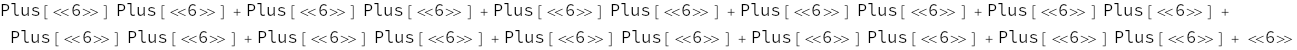
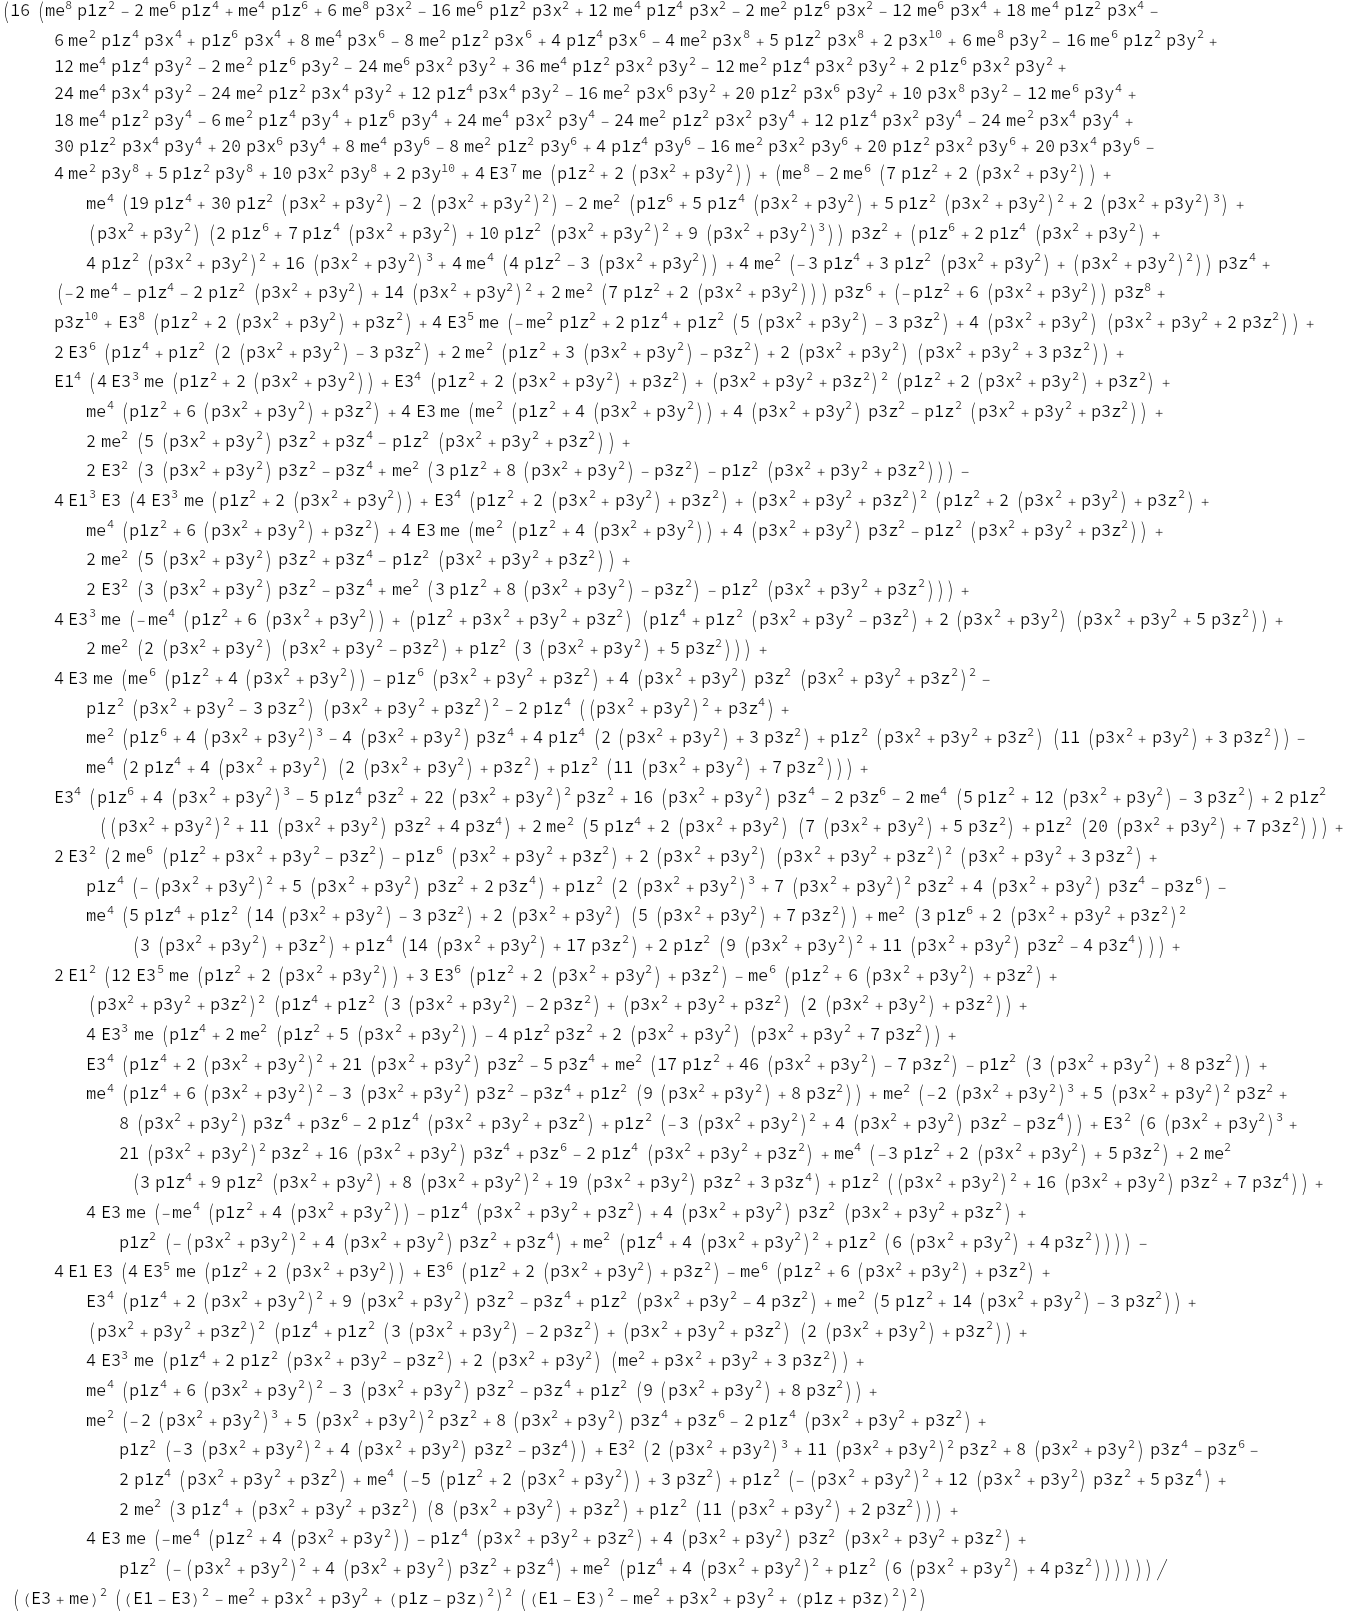

In [32]:
M2 = Sum[M[s1, s2, s3, s4] Conjugate[M[s1, s2, s3, s4]], {s1, 1, 2}, {s2, 1, 2}, {s3, 1, 2}, {s4, 1, 2}]
M2 = FullSimplify[M2]

2      2      2      2     2
{p3x  + p3y  + p3z  -> E3  - me }
       8    2       6    4     4    6       8    2        6    2    2
(16 (me  p1z  - 2 me  p1z  + me  p1z  + 6 me  p3x  - 16 me  p1z  p3x  + 
 
             4    4    2       2    6    2        6    4        4    2    4
>       12 me  p1z  p3x  - 2 me  p1z  p3x  - 12 me  p3x  + 18 me  p1z  p3x  - 
 
            2    4    4      6    4       4    6       2    2    6        4    6
>       6 me  p1z  p3x  + p1z  p3x  + 8 me  p3x  - 8 me  p1z  p3x  + 4 p1z  p3x  - 
 
            2    8        2    8        10       8    2        6    2    2
>       4 me  p3x  + 5 p1z  p3x  + 2 p3x   + 6 me  p3y  - 16 me  p1z  p3y  + 
 
             4    4    2       2    6    2        6    2    2        4    2    2    2
>       12 me  p1z  p3y  - 2 me  p1z  p3y  - 24 me  p3x  p3y  + 36 me  p1z  p3x  p3y  - 
 
             2    4    2    2        6    2    2        4    4    2
>       12 me  p1z  p3x  p3y  + 2 p1z  p3x  p3y  + 24 me  p3x  p3y  - 
 
             2    2    4    2         4    4    2        2    6    2
>       24 me  p1z  p3x  p3y  + 12 p1z  p3x  p3y  - 16 me  p3x  p3y  + 
 
              2    6    2         8    2        6    4        4    2    4
>       20 p1z  p3x  p3y  + 10 p3x  p3y  - 12 me  p3y  + 18 me  p1z  p3y  - 
 
            2    4    4      6    4        4    2    4        2    2    2    4
>       6 me  p1z  p3y  + p1z  p3y  + 24 me  p3x  p3y  - 24 me  p1z  p3x  p3y  + 
 
              4    2    4        2    4    4         2    4    4         6    4
>       12 p1z  p3x  p3y  - 24 me  p3x  p3y  + 30 p1z  p3x  p3y  + 20 p3x  p3y  + 
 
            4    6       2    2    6        4    6        2    2    6
>       8 me  p3y  - 8 me  p1z  p3y  + 4 p1z  p3y  - 16 me  p3x  p3y  + 
 
              2    2    6         4    6       2    8        2    8         2    8
>       20 p1z  p3x  p3y  + 20 p3x  p3y  - 4 me  p3y  + 5 p1z  p3y  + 10 p3x  p3y  + 
 
             10       7        2         2      2
>       2 p3y   + 4 E3  me (p1z  + 2 (p3x  + p3y )) + 
 
           8       6       2         2      2
>       (me  - 2 me  (7 p1z  + 2 (p3x  + p3y )) + 
 
             4        4         2     2      2          2      2 2
>          me  (19 p1z  + 30 p1z  (p3x  + p3y ) - 2 (p3x  + p3y ) ) - 
 
               2     6        4     2      2         2     2      2 2
>          2 me  (p1z  + 5 p1z  (p3x  + p3y ) + 5 p1z  (p3x  + p3y )  + 
 
                    2      2 3        2      2
>             2 (p3x  + p3y ) ) + (p3x  + p3y ) 
 
                  6        4     2      2          2     2      2 2         2      2 3
>           (2 p1z  + 7 p1z  (p3x  + p3y ) + 10 p1z  (p3x  + p3y )  + 9 (p3x  + p3y ) )) 
 
            2       6        4     2      2         2     2      2 2
>        p3z  + (p1z  + 2 p1z  (p3x  + p3y ) + 4 p1z  (p3x  + p3y )  + 
 
                  2      2 3       4       2         2      2
>          16 (p3x  + p3y )  + 4 me  (4 p1z  - 3 (p3x  + p3y )) + 
 
               2        4        2     2      2        2      2 2      4
>          4 me  (-3 p1z  + 3 p1z  (p3x  + p3y ) + (p3x  + p3y ) )) p3z  + 
 
              4      4        2     2      2           2      2 2
>       (-2 me  - p1z  - 2 p1z  (p3x  + p3y ) + 14 (p3x  + p3y )  + 
 
               2       2         2      2       6        2         2      2      8
>          2 me  (7 p1z  + 2 (p3x  + p3y ))) p3z  + (-p1z  + 6 (p3x  + p3y )) p3z  + 
 
           10     8     2         2      2       2
>       p3z   + E3  (p1z  + 2 (p3x  + p3y ) + p3z ) + 
 
            3
>       8 E1  E3 (E3 + me) (-2 (E3 + me) 
 
               2     2      2      2     2         2      2
>           (E3  (p3x  + p3y ) + me  (p1z  + 2 (p3x  + p3y ))) - 
 
              3     2           2     3            2      2             2      2
>          (E3  - E3  me - E3 me  + me  + 3 E3 (p3x  + p3y ) + 5 me (p3x  + p3y )) 
 
               2                4
>           p3z  + (E3 - me) p3z ) + 
 
            4
>    
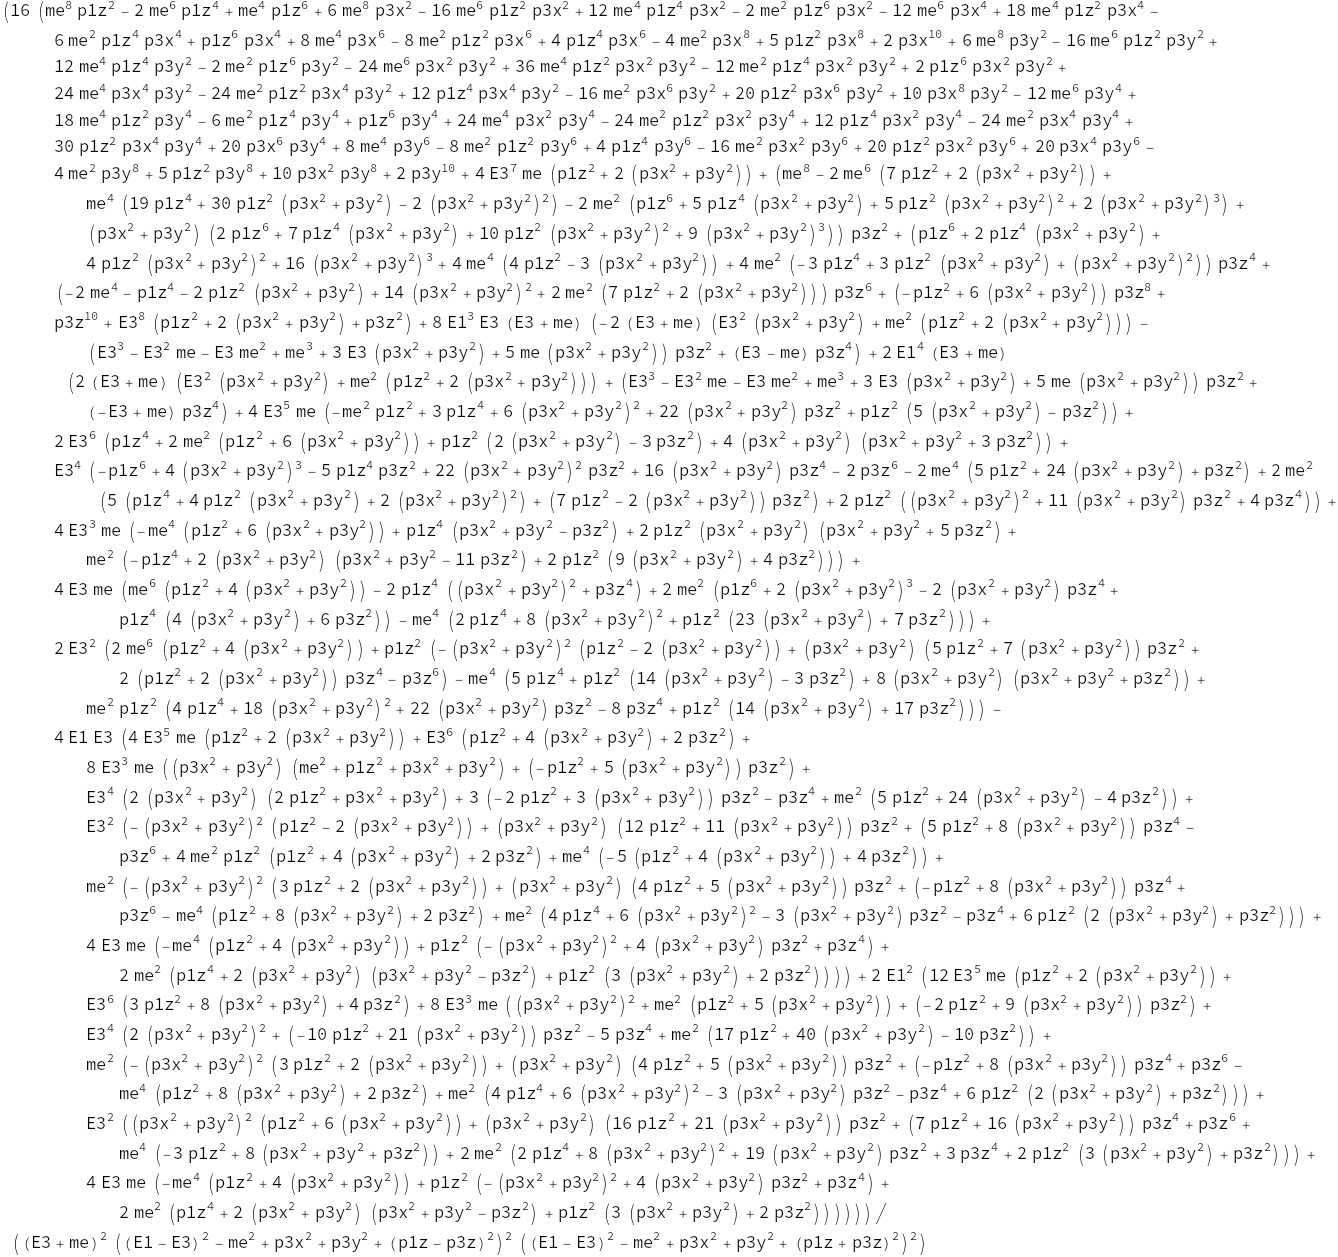

In [34]:
sust = {p3x^2+p3y^2+p3z^2->-me^2+E3^2}
M2 = FullSimplify[M2/.sust]

Se observan muchos términos $p3x^2+p3y^2$, se hará la debida sustitución para dejar todo en términos de masa, energía y $p3z^2$

2      2      2     2      2
{p3x  + p3y  -> E3  - me  - p3z }
          10        9        8    2       6    4     4    6       8    2
(16 (14 E3   + 32 E3  me + me  p1z  - 2 me  p1z  + me  p1z  + 6 me  p3x  - 
 
             6    2    2        4    4    2       2    6    2        6    4
>       16 me  p1z  p3x  + 12 me  p1z  p3x  - 2 me  p1z  p3x  - 12 me  p3x  + 
 
             4    2    4       2    4    4      6    4       4    6       2    2    6
>       18 me  p1z  p3x  - 6 me  p1z  p3x  + p1z  p3x  + 8 me  p3x  - 8 me  p1z  p3x  + 
 
             4    6       2    8        2    8        10       8    2
>       4 p1z  p3x  - 4 me  p3x  + 5 p1z  p3x  + 2 p3x   + 6 me  p3y  - 
 
             6    2    2        4    4    2       2    6    2        6    2    2
>       16 me  p1z  p3y  + 12 me  p1z  p3y  - 2 me  p1z  p3y  - 24 me  p3x  p3y  + 
 
             4    2    2    2        2    4    2    2        6    2    2
>       36 me  p1z  p3x  p3y  - 12 me  p1z  p3x  p3y  + 2 p1z  p3x  p3y  + 
 
             4    4    2        2    2    4    2         4    4    2
>       24 me  p3x  p3y  - 24 me  p1z  p3x  p3y  + 12 p1z  p3x  p3y  - 
 
             2    6    2         2    6    2         8    2        6    4
>       16 me  p3x  p3y  + 20 p1z  p3x  p3y  + 10 p3x  p3y  - 12 me  p3y  + 
 
             4    2    4       2    4    4      6    4        4    2    4
>       18 me  p1z  p3y  - 6 me  p1z  p3y  + p1z  p3y  + 24 me  p3x  p3y  - 
 
             2    2    2    4         4    2    4        2    4    4
>       24 me  p1z  p3x  p3y  + 12 p1z  p3x  p3y  - 24 me  p3x  p3y  + 
 
              2    4    4         6    4       4    6       2    2    6        4    6
>       30 p1z  p3x  p3y  + 20 p3x  p3y  + 8 me  p3y  - 8 me  p1z  p3y  + 4 p1z  p3y  - 
 
             2    2    6         2    2    6         4    6       2    8        2    8
>       16 me  p3x  p3y  + 20 p1z  p3x  p3y  + 20 p3x  p3y  - 4 me  p3y  + 5 p1z  p3y  + 
 
              2    8        10       2      6        4    2       2    4      6     2
>       10 p3x  p3y  + 2 p3y   + 4 me  (4 me  - 16 me  p1z  + 9 me  p1z  - p1z ) p3z  + 
 
              6        4    2        2    4      6     4
>       (48 me  - 72 me  p1z  + 10 me  p1z  - p1z ) p3z  + 
 
                4       2    2      4     6         2        2     8        10
>       4 (11 me  - 7 me  p1z  + p1z ) p3z  + (14 me  - 5 p1z ) p3z  + 2 p3z   + 
 
             7        2      2      2      8       2         2         2
>       32 E3  me (-me  + p1z  + p3z ) + E3  (14 me  + 11 p1z  + 26 p3z ) + 
 
            3             3         2 2         4       2    2      4     2
>       8 E3  me (5 (-2 me  + me p1z )  + (36 me  - 8 me  p1z  + p1z ) p3z  + 
 
                  2      2     4
>          4 (4 me  - p1z ) p3z ) + 
 
                     2      2      2 3        4       2      2     2
>       8 E3 me (-(me  (2 me  - p1z ) ) + 8 me  (-2 me  + p1z ) p3z  - 
 
                  4      4     4
>          2 (4 me  + p1z ) p3z ) + 
 
            2       2                             2      2 2
>       2 E3  (-4 me  (me - p1z) (me + p1z) (-2 me  + p1z )  + 
 
                  6        4    2        2    4      6     2
>          (-40 me  + 72 me  p1z  - 16 me  p1z  + p1z ) p3z  - 
 
                   4        2    2        4     4            2        2     6        8
>          2 (25 me  - 17 me  p1z  + 5 p1z ) p3z  + 2 (-14 me  + 5 p1z ) p3z  - 5 p3z )\
 
               5          4      4        4       2     2        2
>        - 8 E3  me (12 me  - p1z  + 8 p3z  - 4 me  (p1z  - 6 p3z )) + 
 
            4          2    4       4        4     2     2        2
>       4 E1  (E3 + me)  (E3  - 2 me  - 2 p3z  + me  (p1z  - 4 p3z ) + 
 
             2    2      2          3             2
>          E3  (me  + p3z )) - 16 E1  E3 (E3 + me)  
 
            4       4        4     2     2        2      2    2      2
>        (E3  - 2 me  - 2 p3z  + me  (p1z  - 4 p3z ) + E3  (me  + p3z )) - 
 
               
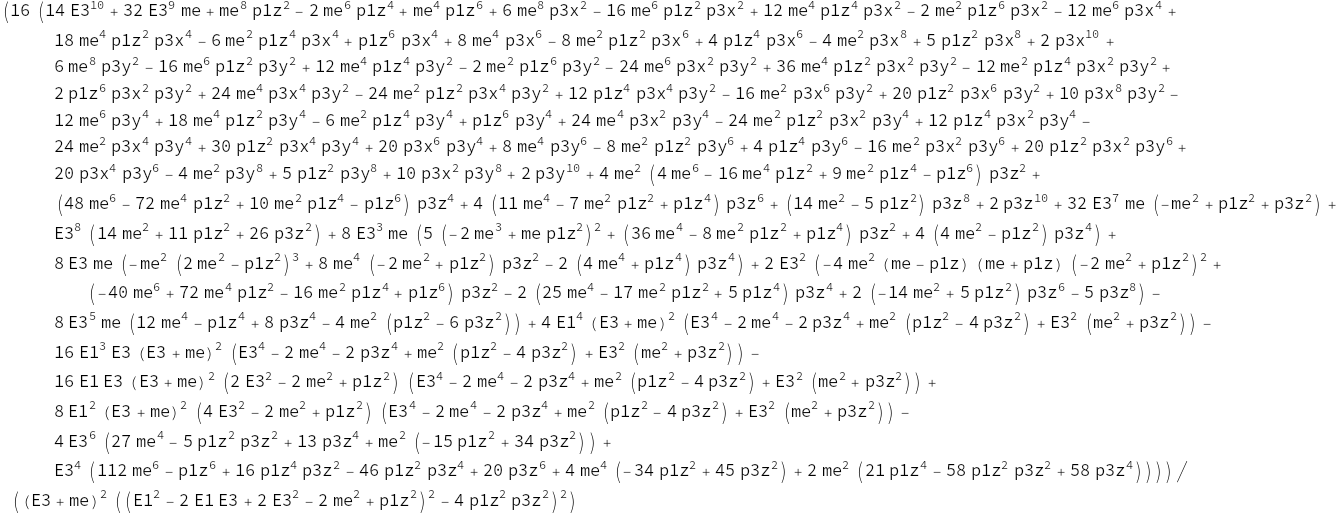

In [36]:
sust = {p3x^2+p3y^2->-me^2+E3^2-p3z^2}
M2 = FullSimplify[M2/.sust]

Dado que el fotón no tiene masa y solo una componente en sus cuadrimomentos, se tiene $p1z^2=E1^2$

2      2     4      4     6      6
{p1z  -> E1 , p1z  -> E1 , p1z  -> E1 }
       5      2          2                               3    2     2      2
(-32 E1  E3 me  (E3 + me)  - 32 E1 E3 (E3 - me) (E3 + me)  (E3  - me  - p3z ) 
 
          2        2      2          3             2
>      (E3  + 2 (me  + p3z )) - 32 E1  E3 (E3 + me)  
 
          4       4       2    2        4     2      2      2
>      (E3  - 3 me  - 4 me  p3z  - 2 p3z  + E3  (2 me  + p3z )) + 
 
        6     4           3        4       2      2 2      4       2      2      2
>     E1  (-E3  + 32 E3 me  + 13 me  + (p3x  + p3y )  - p3z  + 2 E3  (6 me  + p3z ) - 
 
             2     2      2        2
>        2 me  (p3x  + p3y  + 2 p3z )) + 
 
        2       8        7           8        6     2      2          2      2 4
>     E1  (43 E3  + 96 E3  me + 33 me  - 16 me  (p3x  + p3y ) + 5 (p3x  + p3y )  - 
 
              8        5       2      2        6       2         2
>        5 p3z  + 64 E3  me (me  + p3z ) + 4 E3  (27 me  + 13 p3z ) + 
 
             4        2      2 2         4        4        4         2    2         4
>        2 me  (9 (p3x  + p3y )  - 20 p3z ) - 2 E3  (100 me  + 114 me  p3z  + 55 p3z ) - 
 
              3       5        3    2           4
>        32 E3  (10 me  + 11 me  p3z  + 5 me p3z ) + 
 
                    7       5    2       3    4        2         2      2 3        6
>        32 E3 (5 me  + 6 me  p3z  + 2 me  p3z ) + 4 me  (-2 (p3x  + p3y )  - 7 p3z ) + 
 
             2       6       2    4        6       4     2        2
>        4 E3  (-4 me  + 9 me  p3z  + 5 p3z  - 8 me  (p1z  - 2 p3z ))) + 
 
             10        9          2      2      2      2      2 2
>     2 (7 E3   + 16 E3  me + (p3x  + p3y ) (-me  + p3x  + p3y )  
 
               4       2      2 2        8    2        6    4        4    6
>         (3 me  + (p3x  + p3y ) ) + 8 me  p3z  + 24 me  p3z  + 22 me  p3z  + 
 
             2    8      10        7        2      2            5    2      2 2
>        7 me  p3z  + p3z   + 16 E3  me (-me  + p3z ) - 32 E3 me  (me  + p3z )  + 
 
              3   3    2      2       2        2      8      2         2
>        16 E3  me  (me  + p3z ) (5 me  + 4 p3z ) + E3  (7 me  + 13 p3z ) - 
 
             6       4        2    2         4
>        2 E3  (27 me  + 34 me  p3z  + 13 p3z ) - 
 
              5      5       3    2           4
>        16 E3  (3 me  + 6 me  p3z  + 2 me p3z ) + 
 
             4       6        4    2        2    4        6
>        2 E3  (28 me  + 45 me  p3z  + 29 me  p3z  + 5 p3z ) - 
 
           2       8        4    4        2    6        8       6        2        2
>        E3  (16 me  + 50 me  p3z  + 28 me  p3z  + 5 p3z  + 8 me  (-2 p1z  + 5 p3z ))) + 
 
          4      6        5           6       4     2      2      2
>     2 E1  (6 E3  + 16 E3  me - 21 me  + 6 me  (p3x  + p3y  - p3z ) + 
 
              3         2      2        4      2        2
>        16 E3  me (4 me  + p3z ) + 7 E3  (7 me  + 2 p3z ) + 
 
           2         2      2 2        4               5       3    2           4
>        me  (-3 (p3x  + p3y )  - 7 p3z ) - 16 E3 (4 me  + 3 me  p3z  + 2 me p3z ) + 
 
                2      2 3      6        2    4         4     2        2         2
>        2 ((p3x  + p3y )  + p3z ) - 2 E3  (me  + 11 p3z  + me  (-2 p1z  + 17 p3z )))) / 
 
              2     2             2     2 2     2    2 2
>   ((E3 + me)  ((E1  - E1 E3 + E3  - me )  - E1  p3z ) )
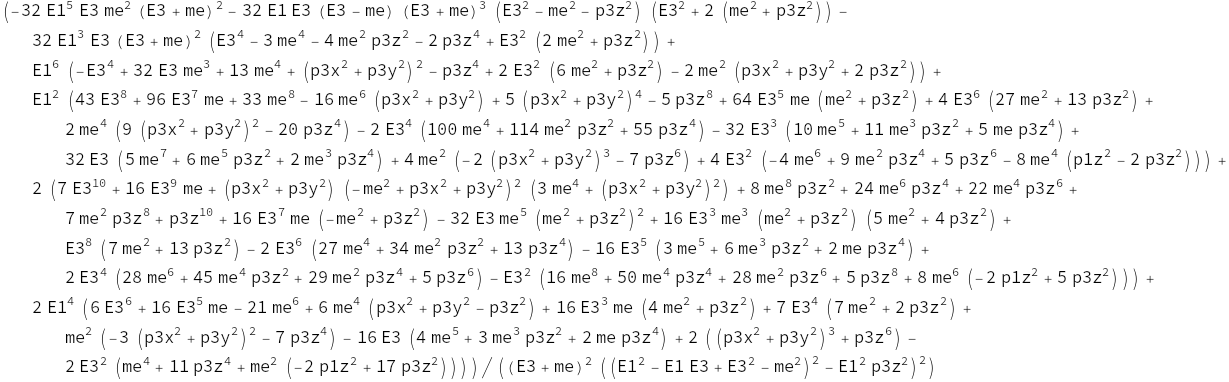

In [38]:
sust = {p1z^2->E1^2, p1z^4->E1^4, p1z^6->E1^6}
M2 = FullSimplify[M2/.sust]

2      2      2     2      2
{p3x  + p3y  -> E3  - me  - p3z }
         5      2          2     6   2    2                 2
(8 (-4 E1  E3 me  (E3 + me)  + E1  me  (E3  + 4 E3 me + 2 me ) + 
 
          4      6       5           4   2        3   3       2   4           5
>       E1  (2 E3  + 4 E3  me + 10 E3  me  + 16 E3  me  + 4 E3  me  - 16 E3 me  - 
 
               6     2   2    2              2    2       2     2              2    4
>          8 me  + E3  me  p1z  + 2 (E3 + me)  (E3  - 3 me ) p3z  - 4 (E3 + me)  p3z ) + 
 
             10       9          7   3       6   4       5   5       4   6
>       2 (E3   + 2 E3  me - 2 E3  me  - 4 E3  me  - 6 E3  me  + 2 E3  me  + 
 
                3   7       2   8          9       10       2   6    2
>          10 E3  me  + 3 E3  me  - 4 E3 me  - 2 me   + 2 E3  me  p1z  + 
 
                    2          4    2       2     2              2          4    4
>          (E3 - me)  (E3 + me)  (E3  - 4 me ) p3z  - 2 (E3 - me)  (E3 + me)  p3z ) + 
 
            2      8       7          6   2       5   3       4   4        3   5
>       2 E1  (3 E3  + 6 E3  me + 5 E3  me  + 4 E3  me  - 8 E3  me  - 20 E3  me  - 
 
               2   6           7       8       2   4    2
>          7 E3  me  + 10 E3 me  + 5 me  - 2 E3  me  p1z  + 
 
                    2      4        2   2       4     2            2      2       2     4
>          (E3 + me)  (2 E3  - 11 E3  me  + 6 me ) p3z  - (E3 + me)  (5 E3  - 2 me ) p3z
 
                                          3    2     2      2     2        2      2
>          ) - 4 E1 E3 (E3 - me) (E3 + me)  (E3  - me  - p3z ) (E3  + 2 (me  + p3z )) - 
 
            3             2    4       4       2    2        4     2      2      2
>       4 E1  E3 (E3 + me)  (E3  - 3 me  - 4 me  p3z  - 2 p3z  + E3  (2 me  + p3z )))) / 
 
              2     2             2     2 2     2    2 2
>   ((E3 + me)  ((E1  - E1 E3 + E3  - me )  - E1  p3z ) )
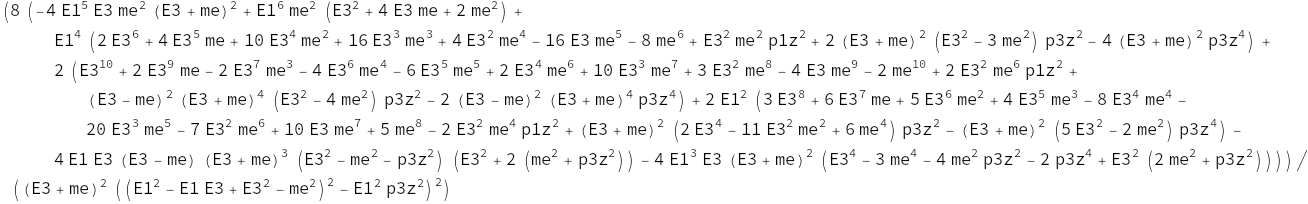

In [40]:
sust = {p3x^2+p3y^2->-me^2+E3^2-p3z^2}
M2 = FullSimplify[M2/.sust]

2      2     4      4     6      6
{p1z  -> E1 , p1z  -> E1 , p1z  -> E1 }
        2             2     2 2    4      2     2    2       4
(16 ((E1  - E1 E3 + E3  - me )  (E3  + (E1  + E3 ) me  - 2 me ) + 
 
                  2   2    2     2
>       ((E1 - E3)  E3  (E1  + E3 ) + 
 
                 4       3           2   2           3       4    2
>          (-3 E1  + 8 E1  E3 - 11 E1  E3  + 10 E1 E3  - 6 E3 ) me  + 
 
                2                 2    4       6     2
>          (6 E1  - 8 E1 E3 + 9 E3 ) me  - 4 me ) p3z  + 
 
              4       3                                         2     2 2
>       (-2 E1  + 4 E1  E3 + 4 E1 E3 (E3 - me) (E3 + me) - 2 (E3  - me )  + 
 
             2       2       2      4         2             2     2 2     2    2 2
>          E1  (-5 E3  + 2 me )) p3z )) / ((E1  - E1 E3 + E3  - me )  - E1  p3z )
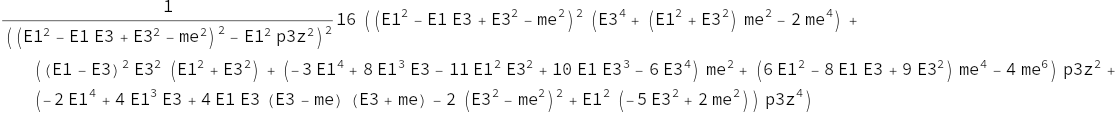

In [42]:
sust = {p1z^2->E1^2, p1z^4->E1^4, p1z^6->E1^6}
M2 = FullSimplify[M2/.sust]

4    2             2 2            2   2    2     2     2
(16 (E3  (E1  - E1 E3 + E3 )  + (E1 - E3)  E3  (E1  + E3 ) p3z  + 
 
              4       3          2   2          3       4     4
>       (-2 E1  + 4 E1  E3 - 5 E1  E3  + 4 E1 E3  - 2 E3 ) p3z )) / 
 
        2             2 2     2    2 2
>   ((E1  - E1 E3 + E3 )  - E1  p3z )
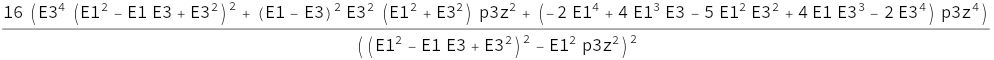

In [46]:
FullSimplify[M2/.{me->0}]

4      2     2    2       4
16 (E3  + (E1  + E3 ) me  - 2 me )
----------------------------------
       2             2     2 2
    (E1  - E1 E3 + E3  - me )
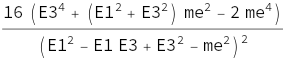

In [51]:
FullSimplify[M2/.{p3z^2->0, p3z^4->0}]